# Problem Set 4, Part One: Due Thursday, February 13 by 8am Eastern Standard Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### Conover Problems on Signed Rank Tests

#### Exercise 5.7.4:

Each member of a girls’ basketball team was given a brief warm-up period
and then told to shoot 25 free throws. The number ${\color{royalblue}{X}}$ of
goals \[sic\] was recorded. Then the team was given an extensive workout
and, after a brief rest period, was told to shoot another 25 free throws
each. The number ${\color{royalblue}{Y}}$ of successful attempts was again
recorded. Do the data indicate that the percentages tend to drop when
the players are tired?

<table>
  <tr>
      <td></td>
    <th colspan="12" style="text-align: center;">Player</th>
  </tr>
  <tr>
      <td></td><th style="text-align: center;">1</th><th style="text-align: center;">2</th><th style="text-align: center;">3</th><th style="text-align: center;">4</th><th style="text-align: center;">5</th><th style="text-align: center;">6</th><th style="text-align: center;">7</th><th style="text-align: center;">8</th><th style="text-align: center;">9</th><th style="text-align: center;">10</th><th style="text-align: center;">11</th><th style="text-align: center;">12</th>
  </tr>
  <tr>
      <th>$X_i$ (<i>before</i>)</th><td style="text-align: center;">$18$</td><td style="text-align: center;">$12$</td><td style="text-align: center;">$7$</td><td style="text-align: center;">$21$</td><td style="text-align: center;">$19$</td><td style="text-align: center;">$14$</td><td style="text-align: center;">$8$</td><td style="text-align: center;">$11$</td><td style="text-align: center;">$19$</td><td style="text-align: center;">$16$</td><td style="text-align: center;">$8$</td><td style="text-align: center;">$11$</td>
  </tr>
  <tr>
      <th>$Y_i$ (<i>after</i>)</th><td style="text-align: center;">$16$</td><td style="text-align: center;">$12$</td><td style="text-align: center;">$8$</td><td style="text-align: center;">$23$</td><td style="text-align: center;">$13$</td><td style="text-align: center;">$10$</td><td style="text-align: center;">$8$</td><td style="text-align: center;">$13$</td><td style="text-align: center;">$9$</td><td style="text-align: center;">$8$</td><td style="text-align: center;">$8$</td><td style="text-align: center;">$5$</td>
  </tr>
</table>

$H_0:$ percentages the same when both tired and fresh

$H_1:$ percentages drop when tired

$W = 7.0$

$p$-value $ = 0.037109375$

$\alpha = 0.05$

Since $p$-value < $\alpha$, we reject the null $H_0$.

In [3]:
from wilcoxondists import signrankpmf, signrankcdf, signrankppf

In [4]:
# ignore the 0 values (i spent too long to realize this)
x = np.array([18, 7, 21, 19, 14, 11, 19, 16, 11])
y = np.array([16, 8, 23, 13, 10, 13, 9, 8, 5])

d = y - x
n = len(x)

r = stats.rankdata(np.abs(d))

print(d, r)

posranks = r[d > 0];

print(d > 0, posranks)

tp = posranks.sum(); 

print(tp)

[ -2   1   2  -6  -4   2 -10  -8  -6] [3.  1.  3.  6.5 5.  3.  9.  8.  6.5]
[False  True  True False False  True False False False] [1. 3. 3.]
7.0


In [5]:
p = signrankcdf(tp,n) # one sided (only care when drop)

print(p) 

0.037109375


In [6]:
stats.wilcoxon(y,x, alternative='less') # double checking, calculate y < x

WilcoxonResult(statistic=7.0, pvalue=0.037109375)

#### Problem 5.7.4:

stats.t(df=n-1).cdf()Compute the paired $t$ test statistic on the data of Exercise 4 and
compare the results with those of the Wilcoxon test. (Use Table A21 with
row $k=11$ \[or `stats.t(df=n-1).cdf()` or `stats.t(df=n-1).sf()`\];
zeros are not discarded in the paired $t$ test.)

$t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}} = \frac{-2.583}{\frac{4.100}{\sqrt{12}}} = -2.1826$

$p$-value $ = 0.02581$ 

This $p$-value is less than the one computed with the wilcoxon test. This shows that our distribution may not come from a normal distribution. When the data is close to a normal, these tests are much closer.

In [7]:
x = np.array([18, 12, 7, 21, 19, 14, 8, 11, 19, 16, 8, 11])
y = np.array([16, 12, 8, 23, 13, 10, 8, 13, 9, 8, 8, 5])

d = y - x
n = len(d)

d_bar = np.mean(d)
s = np.std(d, ddof=1)

print(d_bar, s, n)

t_test = d_bar / (s / np.sqrt(n))
p_value = stats.t(df=n-1).cdf(t_test)

print(t_test, p_value)

-2.5833333333333335 4.100073909163841 12
-2.1826263064277835 0.02581407755772393


#### Exercise 5.7.8:

Four prospective graduate students took the GMAT twice, with the
following scores:

<table>
  <tr>
    <th>Student</th><th>First Attempt</th><th>Second Attempt</th>
  </tr>
  <tr>
    <td>1</td><td>470</td><td>510</td>
  </tr>
  <tr>
    <td>2</td><td>530</td><td>550</td>
  </tr>
  <tr>
    <td>3</td><td>610</td><td>600</td>
  </tr>
  <tr>
    <td>4</td><td>440</td><td>490</td>
  </tr>
</table>

**(a)** Find the exact distribution of the Wilcoxon signed ranks test
    statistic, the sum of the positive signed ranks, and draw a graph of
    its \[cumulative\] distribution function.

<table border="1">
<tr><th>$U_x$</th><th>$W_x$</th><th>Ranks</th><th>Prob</th></tr>
<tr><td>$0$</td><td>$0$</td><td>(-4, -3, -2, -1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$1$</td><td>$1$</td><td>(-4, -3, -2, +1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$2$</td><td>$2$</td><td>(-4, -3, +2, -1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$3$</td><td>$3$</td><td>(-4, +3, -2, -1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$3$</td><td>$3$</td><td>(-4, -3, +2, +1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$4$</td><td>$4$</td><td>(-4, +3, -2, +1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$5$</td><td>$5$</td><td>(-4, +3, +2, -1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$4$</td><td>$4$</td><td>(+4, -3, -2, -1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$6$</td><td>$6$</td><td>(-4, +3, +2, +1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$5$</td><td>$5$</td><td>(+4, -3, -2, +1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$6$</td><td>$6$</td><td>(+4, -3, +2, -1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$7$</td><td>$7$</td><td>(+4, +3, -2, -1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$7$</td><td>$7$</td><td>(+4, -3, +2, +1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$8$</td><td>$8$</td><td>(+4, +3, -2, +1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$9$</td><td>$9$</td><td>(+4, +3, +2, -1)</td><td>$\frac{1}{16}$</td></tr>
<tr><td>$10$</td><td>$10$</td><td>(+4, +3, +2, +1)</td><td>$\frac{1}{16}$</td></tr>
</table>

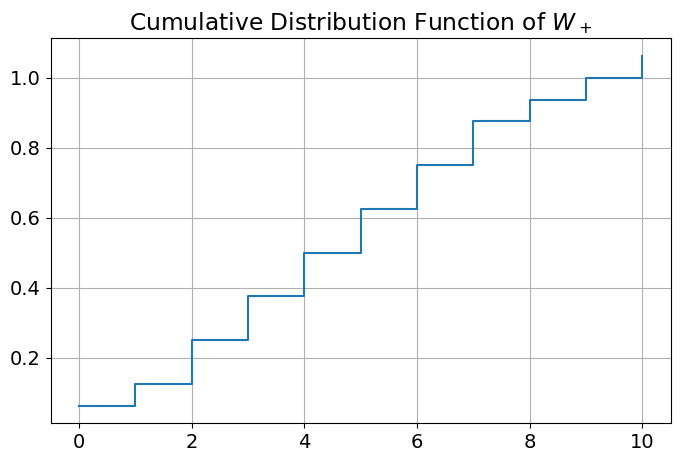

In [8]:
W_values = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
probabilities = np.array([1/16, 1/16, 2/16, 2/16, 2/16, 2/16, 2/16, 2/16, 1/16, 1/16, 1/16])

cdf = np.cumsum(probabilities)

plt.step(W_values, cdf, where='post', label="CDF of Wilcoxon Signed-Rank Statistic")
plt.title("Cumulative Distribution Function of $W_+$")
plt.grid()

**(b)**  Locate the observed value of the test statistic on the graph of part
    a and find the exact $p$-value in an upper-tailed test, or in a
    lower-tailed test, whichever is smaller.

In [9]:
x = np.array([470, 530, 610, 440])
y = np.array([510, 550, 600, 490])

d = y - x
n = len(x)

r = stats.rankdata(np.abs(d))

print(d, r)

posranks = r[d > 0]

print(d > 0, posranks)

tp = posranks.sum(); 

print(tp)

[ 40  20 -10  50] [3. 2. 1. 4.]
[ True  True False  True] [3. 2. 4.]
9.0


In [10]:
p1 = signrankcdf(tp,n) 
p2 = 1-signrankcdf(tp,n)

print(p1, p2) 

print(stats.wilcoxon(y,x, alternative='less')) # double check

0.9375 0.0625
WilcoxonResult(statistic=9.0, pvalue=0.9375)


$p$-value $= 0.0625$

**(c)** Find a nonparametric 80% (approximately) confidence interval for the
    mean *increase in score*.

In [13]:
avg_j = []

for i in range(len(d)):
    for j in range(i, len(d)):
        avg_j.append(0.5*(d[i]+d[j]))
        print(i,j, avg_j[-1])

0 0 40.0
0 1 30.0
0 2 15.0
0 3 45.0
1 1 20.0
1 2 5.0
1 3 35.0
2 2 -10.0
2 3 20.0
3 3 50.0


In [14]:
np.sort(avg_j)

array([-10.,   5.,  15.,  20.,  20.,  30.,  35.,  40.,  45.,  50.])

In [17]:
signrankppf(0.1, 4), signrankppf(0.9, 4)

(1, 9)

In [11]:
n_bootstraps = 1000

bootstrap_means = [np.mean(np.random.choice(d, size=len(d), replace=True)) for _ in range(n_bootstraps)]
bootstrap_means_sorted = np.sort(bootstrap_means)

lower_bound = np.percentile(bootstrap_means_sorted, 10)
upper_bound = np.percentile(bootstrap_means_sorted, 90)

print(f"80% CI: ({lower_bound}, {upper_bound})")

80% CI: (10.0, 40.0)


**(d)**  What is the exact confidence level of the interval you found?

In [12]:
b = (lower_bound > bootstrap_means).sum()
u = (upper_bound < bootstrap_means).sum()

print(f'The actual confidence is {b+u / len(bootstrap_means)}%')

The actual confidence is 74.081%


### Conover (and other) Problems on Rank Sum Tests

#### Exercise 5.1.6:

Ten tents using plain camouflage and 10 using patterned camouflage are
set up in a wooded area, and a team of observers is sent out to find
them. The team reports the distance at which they first sight each tent
(true sightings only) until all 20 tents are found. The purpose of the
study is to determine whether the patterned camouflage is more difficult
to detect than the plain camouflage. The distances at which each tent is
detected are reported as follows:

<table border=1>
<tr><th>Type of camouflage</th><th></th>Distance (meters)</th></tr>
<tr><th>Plain</th><td> 25, 28, 16, 34, 38, 21, 29, 43, 32, 36 </td></tr>
<tr><th>Patterned</th><td> 26, 12, 16, 21, 20, 14, 10, 18, 22, 20 </td></tr>
</table>

**(a)** Perform a hypothesis test.

$H_0:$ there is no difference between the groups

$H_1:$ the patterned group is much harder to see

$w_y = 90$

$p$-value $= 0.00075$

Since the $p$-value < $0.05$, we reject the null hypothesis.

In [13]:
from wilcoxondists import mannwhitneypmf, mannwhitneycdf, mannwhitneyppf

In [14]:
x_i = np.array([25, 28, 16, 34, 38, 21, 29, 43, 32, 36])
y_j = np.array([26, 12, 16, 21, 20, 14, 10, 18, 22, 20])

n = len(x_i)

Ux = np.sum(x_i[None,:] > y_j[:,None]) + 0.5*np.sum(x_i[None,:] == y_j[:,None])
Uy = np.sum(y_j[None,:] > x_i[:,None]) + 0.5*np.sum(y_j[None,:] == x_i[:,None])

print(Ux, Uy)

90.0 10.0


In [15]:
p = mannwhitneycdf(int(Uy), n, n)  

print(p)

print(stats.mannwhitneyu(x_i, y_j, alternative='greater', method='exact'))  # double check

0.0007523436316005976
MannwhitneyuResult(statistic=90.0, pvalue=0.0007523436316005976)


**(b)** Find a nonparametric 95% confidence interval for the difference in mean
detection distances.

In [16]:
from matplotlib.cbook import flatten

In [17]:
print("P(U<=23)=%g" % (mannwhitneycdf(23,n,n)))

P(U<=23)=0.0216285


In [18]:
diff_ij = np.sort(x_i)[:,None]-np.sort(y_j)[None,:]

sorteddiff_v = np.sort(list(flatten(diff_ij)))

print(f"95% CI: ({sorteddiff_v[23]}, {sorteddiff_v[-23-1]})")

95% CI: (6, 19)


#### Problem 5.1.2:

In the case where $n=3$, $m=2$, and $H_0$ is true, find the exact
distribution of ${\color{royalblue}{T}}$ and compare with Table A7.

<table border="1"> 
    <tr><th>$Rank$</th><th>$U_x$</th><th>$T$</th><th>$Prob$</th></tr> 
    <tr><td>1, 2</td><td>1</td><td>3</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>1, 3</td><td>2</td><td>4</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>1, 4</td><td>3</td><td>5</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>1, 5</td><td>4</td><td>6</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>2, 3</td><td>3</td><td>5</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>2, 4</td><td>4</td><td>6</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>2, 5</td><td>5</td><td>7</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>3, 4</td><td>5</td><td>7</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>3, 5</td><td>6</td><td>8</td><td>$\frac{1}{10}$</td></tr> 
    <tr><td>4, 5</td><td>7</td><td>9</td><td>$\frac{1}{10}$</td></tr> 
</table>

#### Mann-Whitney Test on Gravitational Wave Search Results

The paper “Search for gravitational-wave inspiral signals associated
with short Gamma-Ray Bursts during LIGO’s fifth and Virgo’s first
science run” (*The Astrophysical Journal* **715**, 1453 (2010),
available on campus via
<span>[<http://stacks.iop.org/ApJ/715/1453>](http://stacks.iop.org/ApJ/715/1453)</span>
and off campus via
<span>[<http://stacks.iop.org.ezproxy.rit.edu/ApJ/715/1453>](http://stacks.iop.org.ezproxy.rit.edu/ApJ/715/1453)</span>)
reported on a search for gravitational waves in 22 time windows, each
corresponding to a gamma-ray burst. None of these results was
individually significant, i.e., the highest detection statistic was
consistent with noise given the “trials factor” of 22. To test whether
there was an overabundance of signals too weak to be individually
significant, the authors also performed a Mann-Whitney $U$ test of these
22 “on-source” results against a set of 6801 “off-source” searches at
times with no GRB, and reported, “Applying the $U$-test, we find that
the two distributions are consistent with each other; if the on-source
and off-source significances were drawn from the same distribution, they
would yield a $U$-statistic greater than what we observed 53% of the
time.”
    
Download the results files `ps04_onsource.dat` and `ps04_offsource.dat`
from mycourses (On the JupyterHub server, they're automatically included
in the same directory as this notebook.) and perform the Mann-Whitney
$U$ test or the equivalent Wilcoxon rank-sum test. Convert the statistic
to an equivalent $z$ score via the normal approximation using the
expected mean and standard deviation (even if your software does this
for you, check using the raw numbers; note that since both lists have
multiple $0$ values, you will need to use the corrected formula for the
variance considering these ties). Check that the stated $p$-value of
$.53$ is correct.

In [20]:
x_i = np.loadtxt('ps04_onsource.dat', unpack=True)
y_j = np.loadtxt('ps04_offsource.dat', unpack=True)

n = len(x_i); m = len(y_j); N = n + m

xy_r = np.concatenate([x_i, y_j])
ranks_r = stats.rankdata(xy_r)

Ux = np.sum(ranks_r[:n]) - n * (n + 1) / 2

_, count = np.unique(xy_r, return_counts=True)
correctrion = np.sum(count**3 - count) / (N * (N - 1))

mu =  n * m / 2 + 0.5
sigma = np.sqrt(n * m / 12 * (N + 1 - correctrion))

z = (Ux - n * m / 2 + 0.5) / sigma
p = 1 - stats.norm.cdf(z) 

print(f"U_x: {Ux}")
print(f"z-score: {z}")
print(f"p-value: {p}")

U_x: 74128.5
z-score: -0.07491173297562712
p-value: 0.5298575293874039


In [21]:
print(stats.mannwhitneyu(x_i, y_j, alternative='greater')) # double check

MannwhitneyuResult(statistic=74128.5, pvalue=0.5299012267441824)
